In [10]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
from numpy import fft
import pandas as pd

In [12]:
df = pd.read_csv("./data/retail_sales.csv")
df.head()

,date,sales
0,2009-10-01,338630
1,2009-11-01,339386
2,2009-12-01,400264
3,2010-01-01,314640
4,2010-02-01,311022


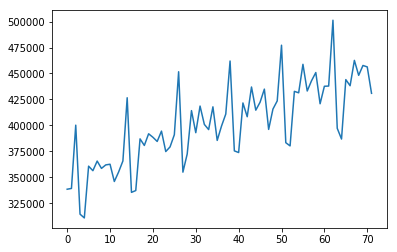

In [28]:
df['sales'].plot()

In [25]:
x = df['sales']
n = x.size # size of the series

t = np.arange(0, n)
p = np.polyfit(t,x,1)
x_notrend = x-p[0]*t
x_freqdom = fft.fft(x_notrend)

C:\Users\pablo\Anaconda3\envs\cnb\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


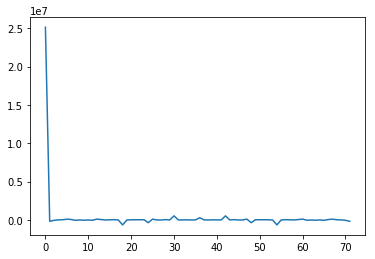

In [27]:
plt.plot(x_freqdom)

In [ ]:
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 5                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    idxs = list(range(n))
    # sort indexes by frequency, lower -> higher
    idxs.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in idxs[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

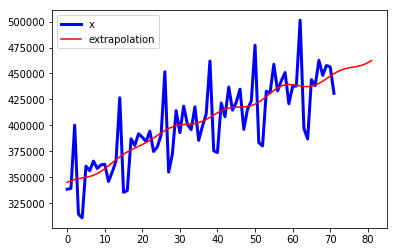

In [19]:
n_predict = 10
extrapolation = fourierExtrapolation(x, n_predict)
plt.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
plt.legend()